<a href="https://colab.research.google.com/github/VidhikaB-Rayate/Projects/blob/main/Food_Price_Predictions/FoodPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://data.humdata.org/dataset/wfp-food-prices-for-india

### **Data Loading**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving wfp_food_prices_ind.csv to wfp_food_prices_ind.csv


In [ ]:
import pandas as pd
df = pd.read_csv("wfp_food_prices_ind.csv")

In [ ]:
df.head(4)

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#loc+market+code,#geo+lat,#geo+lon,#item+type,#item+name,#item+code,#item+unit,#item+price+flag,#item+price+type,#currency+code,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,cereals and tubers,Rice,52,KG,actual,Retail,INR,8,0.26
2,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,oil and fats,Oil (mustard),228,KG,actual,Retail,INR,31,0.99
3,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,923,23.03,72.62,cereals and tubers,Wheat,84,KG,actual,Retail,INR,6.2,0.2


### **Data Exploaration**

In [ ]:
df.shape

(149816, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149816 entries, 0 to 149815
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          149816 non-null  object
 1   admin1        149265 non-null  object
 2   admin2        149265 non-null  object
 3   market        149816 non-null  object
 4   market_id     149816 non-null  object
 5   latitude      149265 non-null  object
 6   longitude     149265 non-null  object
 7   category      149816 non-null  object
 8   commodity     149816 non-null  object
 9   commodity_id  149816 non-null  object
 10  unit          149816 non-null  object
 11  priceflag     149816 non-null  object
 12  pricetype     149816 non-null  object
 13  currency      149816 non-null  object
 14  price         149816 non-null  object
 15  usdprice      149816 non-null  object
dtypes: object(16)
memory usage: 18.3+ MB


**Comment:** All columns have the data type object, even for columns like latitude, longitude, price, and usdprice which ideally should be numeric.
This indicates the presence of mixed data types or non-numeric values (like missing entries, text strings, or special characters) in those columns.

We will need to handle this during the Data Cleaning phase by converting these columns to appropriate numeric types and managing any invalid entries."

In [ ]:
df['admin1'].unique()

array(['#adm1+name', 'Delhi', 'Gujarat', 'Himachal Pradesh', 'Karnataka',
       'Madhya Pradesh', 'Maharashtra', 'Orissa', 'Telangana', 'Tripura',
       'West Bengal', 'Meghalaya', 'Rajasthan', 'Tamil Nadu', 'Kerala',
       'Uttar Pradesh', 'Mizoram', 'Assam', 'Bihar', 'Chandigarh',
       'Nagaland', 'Punjab', 'Uttarakhand', 'Jharkhand', 'Andhra Pradesh',
       'Haryana', 'Andaman and Nicobar', 'Puducherry', 'Goa', nan,
       'Chhattisgarh', 'Manipur', 'Sikkim'], dtype=object)

In [ ]:
df['admin2'].unique()

array(['#adm2+name', 'Delhi', 'Ahmadabad', 'Shimla', 'Bangalore Urban',
       'Bhopal', 'Mumbai city', 'Khordha', 'Hyderabad', 'West Tripura',
       'Kolkata', 'East Khasi Hills', 'Bikaner', 'Chennai',
       'Thiruvananthapuram', 'Lucknow', 'Aizawl', 'Kamrup', 'Patna',
       'Chandigarh', 'Amravati', 'Kohima', 'Amritsar', 'Ludhiana',
       'Dehra Dun', 'Ranchi', 'Krishna', 'Dindigul', 'Kanpur', 'Rajkot',
       'Banka', 'Hisar', 'Karnal', 'Mandi', 'Dharwad', 'Bid', 'Cuttack',
       'Sambalpur', 'Agra', 'Varanasi', 'Darjiling', 'Indore', 'Bathinda',
       'Jodhpur', 'Dimapur', 'Ernakulam', 'Tiruchchirappalli', 'Kota',
       'Andaman Islands', 'Puducherry', 'North Goa', 'Gurgaon',
       'Panchkula', 'Kozhikode', 'Gwalior', 'Jabalpur', 'Sundargarh', nan,
       'Chittoor', 'Kurnool', 'Vishakhapatnam', 'Darbhanga', 'Gaya',
       'Muzaffarpur', 'Purnia', 'Bastar', 'Bilaspur', 'Durg', 'Surguja',
       'Kachchh', 'Surat', 'Kangra', 'Solan', 'Dakshin Kannad', 'Mysore',
       'Palak

In [ ]:
df['market'].unique()

array(['#loc+market+name', 'Delhi', 'Ahmedabad', 'Shimla', 'Bengaluru',
       'Bhopal', 'Mumbai', 'Bhubaneshwar', 'Hyderabad', 'Agartala',
       'Kolkata', 'Shillong', 'Jaipur', 'Chennai', 'Tiruvanantapuram',
       'Lucknow', 'Aizawl', 'Guwahati', 'Patna', 'Chandigarh', 'Raipur',
       'Kohima', 'Amritsar', 'Ludhiana', 'Dehradun', 'Ranchi',
       'Vijaywada', 'Dindigul', 'Kanpur', 'Rajkot', 'Bhagalpur', 'Hisar',
       'Karnal', 'Mandi', 'Dharwad', 'Nagpur', 'Cuttack', 'Sambalpur',
       'Agra', 'Varanasi', 'Siliguri', 'Indore', 'Bathinda', 'Jodhpur',
       'Dimapur', 'Ernakulam', 'Thiruchirapalli', 'Kota', 'Port Blair',
       'Puducherry', 'Panaji', 'Gurgaon', 'Panchkula', 'Kozhikode',
       'T.Puram', 'Gwalior', 'Jabalpur', 'Rourkela', 'National Average',
       'Mayabunder', 'Tirupathi', 'Kurnool', 'Visakhapatnam', 'Darbhanga',
       'Bihar_Gaya', 'Muzzafarpur', 'Purnia', 'Jagdalpur', 'Bilaspur',
       'Durg', 'Ambikapur', 'Bhuj', 'Surat', 'Dharamshala', 'Solan',
       '

In [ ]:
df_North = df[df['admin2']=='Bhopal']
df_North.head(3)

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
13,1994-01-15,Madhya Pradesh,Bhopal,Bhopal,928,23.27,77.4,cereals and tubers,Rice,52,KG,actual,Retail,INR,6.25,0.2
14,1994-01-15,Madhya Pradesh,Bhopal,Bhopal,928,23.27,77.4,cereals and tubers,Wheat,84,KG,actual,Retail,INR,4.5,0.14
15,1994-01-15,Madhya Pradesh,Bhopal,Bhopal,928,23.27,77.4,miscellaneous food,Sugar,97,KG,actual,Retail,INR,13.25,0.42


**Comments:** Column admin1 represents States and Union Territories, such as various states across the country, with Andaman and Nicobar Islands being an example of a Union Territory.

Column admin2 corresponds to cities within these regions.

Column market is almost the same as admin2 so we will drop that and instead we will create new column as Zones as markets do include some zones

### **Data Cleaning**

In [3]:
df2 = df.drop(0)
df2 = df2.reset_index(drop=True)
df2.head(2)

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,cereals and tubers,Rice,52,KG,actual,Retail,INR,8,0.26
1,1994-01-15,Delhi,Delhi,Delhi,934,28.67,77.22,oil and fats,Oil (mustard),228,KG,actual,Retail,INR,31,0.99


In [ ]:
df2.describe()

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
count,149815,149264,149264,149815,149815,149264,149264.00,149815,149815,149815,149815,149815,149815,149815,149815.0,149815.00
unique,374,31,163,170,227,217,210.00,6,23,46,3,1,2,1,25209.0,2534.00
top,2022-04-15,Uttar Pradesh,Mumbai city,Mumbai,955,18.98,75.83,oil and fats,Rice,52,KG,actual,Retail,INR,40.0,0.27
freq,2318,11712,3287,3287,1786,1786,2524.00,36873,11221,6319,140471,149815,148215,149815,1664.0,1641.00


In [ ]:
df2.isnull().sum()

,0
date,0
admin1,551
admin2,551
market,0
market_id,0
latitude,551
longitude,551
category,0
commodity,0
commodity_id,0


In [ ]:
df2[df2[['admin1']].isnull().any(axis=1)].head()

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
30975,2015-07-15,NaN,NaN,National Average,1887,NaN,NaN,cereals and tubers,Potatoes,83,KG,actual,Retail,INR,15.78,0.25
30976,2015-07-15,NaN,NaN,National Average,1887,NaN,NaN,cereals and tubers,Rice,52,KG,actual,Retail,INR,27.52,0.43
30977,2015-07-15,NaN,NaN,National Average,1887,NaN,NaN,cereals and tubers,Wheat,84,KG,actual,Retail,INR,22.64,0.36
30978,2015-07-15,NaN,NaN,National Average,1887,NaN,NaN,cereals and tubers,Wheat flour,58,KG,actual,Retail,INR,24.67,0.39
30979,2015-07-15,NaN,NaN,National Average,1887,NaN,NaN,milk and dairy,Milk (pasteurized),463,L,actual,Retail,INR,39.45,0.62


In [ ]:
null_check = df2[df2['admin1'].isnull() & df2['admin2'].isnull() & df2['latitude'].isnull() & df2['longitude'].isnull()]
len(null_check)

551

In [7]:
check = df2[df2['market']=='National Average']
len(check)

551

**Comments:** Found 551 rows for 'National Average' market with null values in admin1, admin2, latitude, and longitude. These represent country-level price records without regional details, so the nulls are acceptable.


In [8]:
df2.loc[df2['market'] == 'National Average', ['admin1', 'admin2']] = df2.loc[df2['market'] == 'National Average', ['admin1', 'admin2']].fillna('National')
check.head(3)

,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
30975,2015-07-15,National,National,National Average,1887,NaN,NaN,cereals and tubers,Potatoes,83,KG,actual,Retail,INR,15.78,0.25
30976,2015-07-15,National,National,National Average,1887,NaN,NaN,cereals and tubers,Rice,52,KG,actual,Retail,INR,27.52,0.43
30977,2015-07-15,National,National,National Average,1887,NaN,NaN,cereals and tubers,Wheat,84,KG,actual,Retail,INR,22.64,0.36


**Comments:**
Replaced null values in admin1 and admin2 columns with 'National' for 'National Average' market rows to maintain consistency.

Latitude and longitude fields remain NaN as these records represent aggregated country-level data without specific location.

In [9]:
df3 = df2.drop(columns=['market'])

In [10]:
df3.head(2)

,date,admin1,admin2,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,1994-01-15,Delhi,Delhi,934,28.67,77.22,cereals and tubers,Rice,52,KG,actual,Retail,INR,8,0.26
1,1994-01-15,Delhi,Delhi,934,28.67,77.22,oil and fats,Oil (mustard),228,KG,actual,Retail,INR,31,0.99


In [11]:
df3['admin1'].unique()

array(['Delhi', 'Gujarat', 'Himachal Pradesh', 'Karnataka',
       'Madhya Pradesh', 'Maharashtra', 'Orissa', 'Telangana', 'Tripura',
       'West Bengal', 'Meghalaya', 'Rajasthan', 'Tamil Nadu', 'Kerala',
       'Uttar Pradesh', 'Mizoram', 'Assam', 'Bihar', 'Chandigarh',
       'Nagaland', 'Punjab', 'Uttarakhand', 'Jharkhand', 'Andhra Pradesh',
       'Haryana', 'Andaman and Nicobar', 'Puducherry', 'Goa', 'National',
       'Chhattisgarh', 'Manipur', 'Sikkim'], dtype=object)

In [12]:
def assign_zone(state):
    if state in ['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Uttarakhand', 'Haryana', 'Delhi', 'Uttar Pradesh', 'Chandigarh']:
        return 'North'
    elif state in ['West Bengal', 'Orissa', 'Bihar', 'Jharkhand', 'Sikkim', 'Assam', 'Arunachal Pradesh', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura']:
        return 'East'
    elif state in ['Rajasthan', 'Gujarat', 'Madhya Pradesh', 'Chhattisgarh', 'Maharashtra', 'Goa']:
        return 'West'
    elif state in ['Andhra Pradesh', 'Telangana', 'Karnataka', 'Tamil Nadu', 'Kerala', 'Puducherry', 'Andaman and Nicobar', 'Lakshadweep']:
        return 'South'
    elif state == 'National':
        return 'National'
    else:
        return 'Unknown'

# Apply the zone assignment
df3['zone'] = df3['admin1'].apply(assign_zone)

**Comments:**Dropped redundant 'market' column as it almost mirrored 'admin2'.

Created new 'zone' column by mapping 'admin1' (states/UTs) to their respective regions: North, South, East, West. 'National Average' records assigned to 'National' zone for consistency.

In [16]:
df3.rename(columns={'admin1':'state_ut','admin2':'city'},inplace=True)

In [17]:
df3.tail()

,date,state_ut,city,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,zone,year,month,day
149810,2025-02-15,Rajasthan,Jaipur,9638.0,26.94,75.8,oil and fats,Oil (palm),62.0,KG,actual,Retail,INR,126.92,1.46,West,2025,2,15
149811,2025-02-15,Rajasthan,Jaipur,9638.0,26.94,75.8,oil and fats,Oil (soybean),306.0,KG,actual,Retail,INR,145.68,1.68,West,2025,2,15
149812,2025-02-15,Rajasthan,Jaipur,9638.0,26.94,75.8,pulses and nuts,Lentils,108.0,KG,actual,Retail,INR,142.05,1.64,West,2025,2,15
149813,2025-02-15,Rajasthan,Jaipur,9638.0,26.94,75.8,pulses and nuts,Lentils (masur),61.0,KG,actual,Retail,INR,88.41,1.02,West,2025,2,15
149814,2025-02-15,Rajasthan,Jaipur,9638.0,26.94,75.8,vegetables and fruits,Tomatoes,114.0,KG,actual,Retail,INR,22.23,0.26,West,2025,2,15


**Comment:**
Renamed 'admin1' to 'state_ut' and 'admin2' to 'city' for better clarity and readability.

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149815 entries, 0 to 149814
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          149815 non-null  datetime64[ns]
 1   state_ut      149815 non-null  object        
 2   city          149815 non-null  object        
 3   market_id     149815 non-null  float64       
 4   latitude      149264 non-null  float64       
 5   longitude     149264 non-null  float64       
 6   category      149815 non-null  object        
 7   commodity     149815 non-null  object        
 8   commodity_id  149815 non-null  float64       
 9   unit          149815 non-null  object        
 10  priceflag     149815 non-null  object        
 11  pricetype     149815 non-null  object        
 12  currency      149815 non-null  object        
 13  price         149815 non-null  float64       
 14  usdprice      149815 non-null  float64       
 15  zone          149

In [19]:
cols_to_convert = ['price', 'usdprice','latitude', 'longitude','market_id','commodity_id']
df3[cols_to_convert] = df3[cols_to_convert].astype(float)
df3['date'] = pd.to_datetime(df3['date'])
df3['year'] = df3['date'].dt.year
df3['month'] = df3['date'].dt.month
df3['day'] = df3['date'].dt.day

**Comments:**Converted data columns to numeric type where necessary, transformed the date column into datetime format, and extracted the year and month into separate columns for better time-based analysis.

In [20]:
df3.tail(5)

,date,state_ut,city,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,zone,year,month,day
149810,2025-02-15,Rajasthan,Jaipur,9638.0,26.94,75.8,oil and fats,Oil (palm),62.0,KG,actual,Retail,INR,126.92,1.46,West,2025,2,15
149811,2025-02-15,Rajasthan,Jaipur,9638.0,26.94,75.8,oil and fats,Oil (soybean),306.0,KG,actual,Retail,INR,145.68,1.68,West,2025,2,15
149812,2025-02-15,Rajasthan,Jaipur,9638.0,26.94,75.8,pulses and nuts,Lentils,108.0,KG,actual,Retail,INR,142.05,1.64,West,2025,2,15
149813,2025-02-15,Rajasthan,Jaipur,9638.0,26.94,75.8,pulses and nuts,Lentils (masur),61.0,KG,actual,Retail,INR,88.41,1.02,West,2025,2,15
149814,2025-02-15,Rajasthan,Jaipur,9638.0,26.94,75.8,vegetables and fruits,Tomatoes,114.0,KG,actual,Retail,INR,22.23,0.26,West,2025,2,15


In [ ]:
df3['unit'].unique()

array(['KG', '100 KG', 'L'], dtype=object)

In [ ]:
unit = df3[df3['unit']=='100 KG']
unit

,date,state_ut,city,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,zone,year,month,day
1849,2000-01-15,Delhi,Delhi,934.0,28.67,77.22,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,1075.00,24.73,North,2000,1,15
1850,2000-01-15,Delhi,Delhi,934.0,28.67,77.22,cereals and tubers,Wheat,84.0,100 KG,actual,Wholesale,INR,700.00,16.10,North,2000,1,15
1865,2000-01-15,Maharashtra,Mumbai city,955.0,18.98,72.83,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,1136.50,26.14,West,2000,1,15
1877,2000-01-15,Tamil Nadu,Chennai,931.0,13.08,80.28,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,1067.50,24.56,South,2000,1,15
1897,2000-02-15,Bihar,Patna,957.0,25.60,85.12,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,810.00,18.58,East,2000,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76233,2020-10-15,Delhi,Delhi,934.0,28.67,77.22,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,2862.07,38.98,North,2020,10,15
76238,2020-10-15,Delhi,Delhi,934.0,28.67,77.22,miscellaneous food,Sugar,97.0,100 KG,actual,Wholesale,INR,3491.72,47.56,North,2020,10,15
76708,2020-10-15,Maharashtra,Mumbai city,955.0,18.98,72.83,cereals and tubers,Wheat,84.0,100 KG,actual,Wholesale,INR,2775.00,37.80,West,2020,10,15
76714,2020-10-15,Maharashtra,Mumbai city,955.0,18.98,72.83,miscellaneous food,Sugar,97.0,100 KG,actual,Wholesale,INR,3311.10,45.10,West,2020,10,15


In [ ]:
wholesale = df3[df3['pricetype']=='Wholesale']
wholesale

,date,state_ut,city,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,zone,year
1849,2000-01-15,Delhi,Delhi,934.0,28.67,77.22,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,1075.00,24.73,North,2000
1850,2000-01-15,Delhi,Delhi,934.0,28.67,77.22,cereals and tubers,Wheat,84.0,100 KG,actual,Wholesale,INR,700.00,16.10,North,2000
1865,2000-01-15,Maharashtra,Mumbai city,955.0,18.98,72.83,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,1136.50,26.14,West,2000
1877,2000-01-15,Tamil Nadu,Chennai,931.0,13.08,80.28,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,1067.50,24.56,South,2000
1897,2000-02-15,Bihar,Patna,957.0,25.60,85.12,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,810.00,18.58,East,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76233,2020-10-15,Delhi,Delhi,934.0,28.67,77.22,cereals and tubers,Rice,52.0,100 KG,actual,Wholesale,INR,2862.07,38.98,North,2020
76238,2020-10-15,Delhi,Delhi,934.0,28.67,77.22,miscellaneous food,Sugar,97.0,100 KG,actual,Wholesale,INR,3491.72,47.56,North,2020
76708,2020-10-15,Maharashtra,Mumbai city,955.0,18.98,72.83,cereals and tubers,Wheat,84.0,100 KG,actual,Wholesale,INR,2775.00,37.80,West,2020
76714,2020-10-15,Maharashtra,Mumbai city,955.0,18.98,72.83,miscellaneous food,Sugar,97.0,100 KG,actual,Wholesale,INR,3311.10,45.10,West,2020


In [ ]:
check_unit = df3[(df3['pricetype'] == 'Wholesale') & (df3['unit']=='100 KG')]
len(check_unit)

1600

In [ ]:
unit1 = df3[df3['unit']=='KG']
unit1.shape

(140471, 17)

In [ ]:
unit2 = df3[(df3['pricetype'] == 'Retail') & (df3['unit']=='KG')]
len(unit2)

140471

In [ ]:
unit3 = df3[df3['unit']=='L']
unit3.head(3)

,date,state_ut,city,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,zone,year,month
7974,2009-01-15,Delhi,Delhi,934.0,28.67,77.22,milk and dairy,Milk,81.0,L,actual,Retail,INR,21.0,0.43,North,2009,1
7980,2009-01-15,Gujarat,Ahmadabad,923.0,23.03,72.62,milk and dairy,Milk,81.0,L,actual,Retail,INR,24.2,0.50,West,2009,1
7988,2009-01-15,Karnataka,Bangalore Urban,926.0,12.96,77.58,milk and dairy,Milk,81.0,L,actual,Retail,INR,16.0,0.33,South,2009,1


**Comment:** When the unit is '100KG', it always belongs to the 'Wholesale' price.

When unit is 'KG', the price type is 'Retail' and commodities include items like Rice, Oil, Wheat, Lentils, etc.

When unit is 'L', the price type is 'Retail' and commodities include items like Milk.


### **One Hot Encoding**

In [22]:
df4 = df3[['year','month','day','state_ut','commodity','unit','pricetype','price','usdprice']]

In [23]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149815 entries, 0 to 149814
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       149815 non-null  int32  
 1   month      149815 non-null  int32  
 2   day        149815 non-null  int32  
 3   state_ut   149815 non-null  object 
 4   commodity  149815 non-null  object 
 5   unit       149815 non-null  object 
 6   pricetype  149815 non-null  object 
 7   price      149815 non-null  float64
 8   usdprice   149815 non-null  float64
dtypes: float64(2), int32(3), object(4)
memory usage: 8.6+ MB


In [96]:
features = ['year', 'month', 'state_ut', 'commodity', 'pricetype']
target = 'price'

df_encoded = pd.get_dummies(df4[features], drop_first=True).astype(int)
df_encoded.shape

(149815, 56)

**Comments:** Dopped non-numerical columns and also the first dummy variable from each column to avoid the "dummy variable trap"

### **Model Building**

In [65]:
from sklearn.model_selection import train_test_split

In [62]:
X = df_encoded
Y = df4[['price','usdprice']]

In [66]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=100)

**Comment:** The dataset is separated into features and target variables. Then, the data is split into training and testing sets (70% for training, 30% for testing).

In [71]:
X_train_cols = X_train.columns
len(X_train_cols)

56

In [141]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model(X,Y):
  algos = {
      'linear_regression' : {
          'model' :LinearRegression(),
          'params' : {}
        },
      'Decision_tree_Regression':{
          'model':DecisionTreeRegressor(),
          'params':{
              'criterion':['squared_error','friedman_mse'],
              'splitter':['best','random'],
              'max_depth':[5,10,20]
          }
      },
      'Random_Forest_Regression':{
          'model':RandomForestRegressor(),
          'params' :{
              'max_depth':[20],
              'n_estimators':[50]
          }
      }
  }

  scores = []
  cv = ShuffleSplit(n_splits=3,test_size=0.2,random_state=45)

  for algo,config in algos.items():
    gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False,n_jobs=-1)
    gs.fit(X,Y)
    scores.append({
        'model':algo,
        'best_score':gs.best_score_,
        'best_params':gs.best_params_
    })
  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [142]:
res = find_best_model(X,Y)
res

,model,best_score,best_params
0,linear_regression,0.837217,{}
1,Decision_tree_Regression,0.990562,"{'criterion': 'friedman_mse', 'max_depth': 20,..."
2,Random_Forest_Regression,0.992137,"{'max_depth': 20, 'n_estimators': 50}"


**Comment:** Using GridSearchCV to find the best combination of hyperparameters for each model.The best model is selected based on the highest score (accuracy) it achieved during cross-validation.



In [68]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=20,n_estimators=50)
rf.fit(X_train,Y_train)
rf.score(x_test,y_test)

0.9920085164986985

In [86]:
imp = rf.feature_importances_
show = pd.DataFrame({
    'Feature':X_train_cols,
    'Imp':imp
})
show = show.sort_values(by='Imp',ascending=False)
show.head(10)

,Feature,Imp
55,pricetype_Wholesale,0.738850
0,year,0.142733
51,commodity_Tea (black),0.027973
49,commodity_Sugar,0.025507
40,commodity_Oil (groundnut),0.006741
27,state_ut_Tamil Nadu,0.006008
41,commodity_Oil (mustard),0.005048
44,commodity_Oil (sunflower),0.004862
53,commodity_Wheat,0.004717
1,month,0.004120


In [87]:
train_score = rf.score(X_train,Y_train)
test_score = rf.score(x_test,y_test)

print("Train score = ",train_score)
print("Test score = ",test_score)

Train score =  0.9966628735349367
Test score =  0.9920085164986985


**Comments:** Different models were tested using GridSearchCV to find the best-performing one.

Random Forest Regressor gave the highest accuracy score.
Random Forest works by creating multiple Decision Trees and averaging their predictions, which reduces overfitting and improves model stability.
This approach fits well for this dataset, which involves:
* Food prices changing over the years
* Different states
* Different food categories
* Different units and price types

 The data naturally follows condition-based changes (like if year is 2025 and state is Maharashtra and category is Sugar → price is XYZ),
 which individual Decision Trees capture well. But Random Forest improves upon this by combining multiple trees to avoid overfitting
 and handle noisy or complex patterns in the data better.

 Also, checked both train and test scores for the Random Forest model. Train score and test score are almost equal and both are very high.


In [81]:
import numpy as np
def predict_price(model,X_train_cols,year,month,state_ut,commodity,pricetype):
  input_data = pd.DataFrame(data = np.zeros((1,len(X_train_cols))),columns=X_train_cols)

  input_data.at[0, 'year'] = year
  input_data.at[0,'month'] = month

  state_ut_col = f'state_ut_{state_ut}'
  commodity_col = f'commodity_{commodity}'
  pricetype_col = f'pricetype_{pricetype}'

  if state_ut_col in input_data.columns:
    input_data.at[0,state_ut_col] = 1.0
  if commodity_col in input_data.columns:
    input_data.at[0,commodity_col] = 1.0
  if pricetype_col in input_data.columns:
    input_data.at[0,pricetype_col] = 1.0

  pred_price = model.predict(input_data)
  return pred_price

In [85]:
predict_price(rf,X_train_cols,2026,4,'Maharashtra','Sugar','Retail')

array([[41.39259301,  0.53459004]])

In [82]:
predict_price(rf,X_train_cols,2025,2,'Maharashtra','Sugar','Retail')

array([[41.39259301,  0.53459004]])

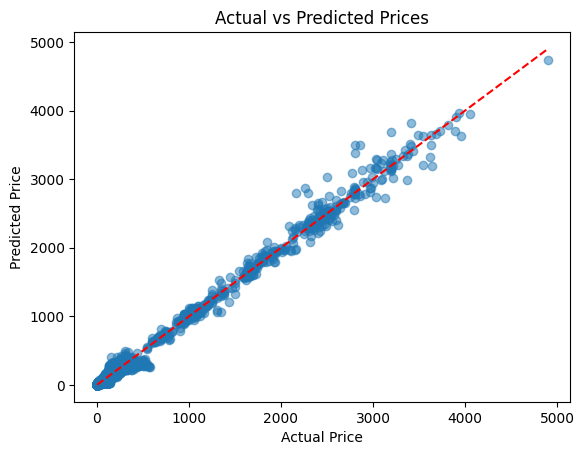

In [88]:
import matplotlib.pyplot as plt
# Predict prices on test set
y_pred = rf.predict(x_test)

# Plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test['price'].min(), y_test['price'].max()],
         [y_test['price'].min(), y_test['price'].max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

**Comment:** However, when evaluating the model’s performance on the test dataset (known data),the Actual vs Predicted Prices scatter plot shows that the model predicts prices very accurately.

The red dashed line represents where perfect predictions would lie, and it helps you visually assess how accurate the model is by comparing how far the scatter points are from the line.

 This indicates that the model is highly accurate on the test data but struggles to generalize for future, unseen years. This reinforces the earlier observation — while the Random Forest model captures existing patterns well, it lacks forecasting ability for new years because it relies heavily on the patterns present in the training data.


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df_encoded
# Add constant
X_c = add_constant(X)

# Calculate VIF
vif = pd.DataFrame()
vif["Feature"] = X_c.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


**Comment:** Checked for multicollinearity using Variance Inflation Factor (VIF). Observed high VIF values for several features like 'state_ut' and 'commodity'.
To address multicollinearity and improve model performance, performed preprocessing steps:
1. Applied StandardScaler to standardize the features.
2. Used Principal Component Analysis (PCA) for dimensionality reduction,

which helps in handling collinearity and retaining essential information for model training.



In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [109]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [119]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

print(f"Original shape: {X.shape}, After PCA: {X_pca_df.shape}")


Original shape: (149815, 56), After PCA: (149815, 51)


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, Y, test_size=0.2, random_state=42)

model = RandomForestRegressor(max_depth=20,n_estimators=50,random_state=52)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=50, random_state=52)

In [124]:
def predict_price_pca(model, scaler, pca, X_columns, year, month, state_ut, commodity, pricetype):
    input_data = pd.DataFrame(columns=X_columns, dtype=np.float64)
    input_data.loc[0] = 0.0
    input_data.at[0, 'year'] = year
    input_data.at[0, 'month'] = month

    for col in X_columns:
        if f"state_ut_{state_ut}" == col:
            input_data.at[0, col] = 1
        if f"commodity_{commodity}" == col:
            input_data.at[0, col] = 1
        if f"pricetype_{pricetype}" == col:
            input_data.at[0, col] = 1


    # Standardize
    input_scaled = scaler.transform(input_data)

    # Apply PCA
    input_pca = pca.transform(input_scaled)

    # Predict
    predicted_price = model.predict(input_pca)

    print(predicted_price)

In [139]:
predict_price_pca(model,scaler,pca,X.columns,2025,12,'Maharashtra','Milk (pasteurized)','Retail')

[[56.35756611  0.70149133]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [140]:
predict_price_pca(model,scaler,pca,X.columns,2026,1,'Maharashtra','Milk (pasteurized)','Retail')

[[57.286739    0.68602267]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Comment:** Now, the model is finally able to predict prices for future years as well.

This will help in forecasting food commodity prices and assist in market planning and decision-making.
